<h1>ANÁLISIS EXPLORATORIO DE DATOS EN PYTHON</h1> 
                (2860098)
                
P211710112 CO2860098 R73 C9226 

INSTRUCTOR: LUIS ALBERTO GALICIA GUERRERO

Aprendiz: Cesar Ricardo Moreno Bedoya

Nov 2023

<h2>Informe de resultados obtenidos del análisis de datos exploratorio realizado al caso de estudio. AA4-EV01</h2>


***INTRODUCCION***

El presente informe se realiza como requisito de aprendizaje al final del curso de Analisis Exploratorio de Datos en Python, realizado en la platafoma ANACONDA con la aplicacion JUPYTERLAB, buscamos demostrar como logramos realizar un adecuado analisis de datos usando el lenguaje de programacion PYTHON y sus librerias destinadas para el desarrollo de CIENCIA DE DATOS, mostramos aqui los procedimientos, requerimientos y concluciones de un adecuado EDA.

***ESTUDIO DE CASO***

La empresa A&A Ltda, empieza un proceso de implementación de Machine Learning, usted ha sido designado para una de las tareas más importante dentro del proyecto, el cual consisten en realizar el análisis exploratorio de los datos y documentar los resultados encontrados, generando un informe que involucre los procedimientos y los resultados. 
El archivo que se analizara corresponde a precios de viviendas y locales para la venta y la colección de datos cuenta con variables que se ven involucradas en ese valor.
La información se encuentra en el siguiente enlace: https://www.datos.gov.co/Hacienda-y-Cr-dito-P-blico/Inmuebles-Disponibles-Para-La-Venta/72gd-px77/data 

Procedimiento para la importación del archivo en formato CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Inmuebles_Disponibles_Para_La_Venta.csv')

***OBJETIVOS***

1. Determinar el precio con menor valor
2. Determinar el predio con mayor valor
3. Observar la distribucion de Precios frente al Area Construida
4. Delimitar rangos de precio.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Codigo                  448 non-null    int64 
 1   Ciudad                  448 non-null    object
 2   Departamento            448 non-null    object
 3   Barrio                  59 non-null     object
 4   Direccion               448 non-null    object
 5   Area Terreno            448 non-null    int64 
 6   Area Construida         448 non-null    int64 
 7   Detalle Disponibilidad  448 non-null    object
 8   Estrato                 448 non-null    object
 9   Precio                  448 non-null    int64 
 10  Tipo de Inmueble        448 non-null    object
 11  Datos Adicionales       77 non-null     object
dtypes: int64(4), object(8)
memory usage: 42.1+ KB


Aqui encontramos el total de registros y columas detalladamente, tambien determina cuales columnas son numericas y cuales son categoricas.

In [4]:
df.isnull().sum()

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    389
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         371
dtype: int64

Identificamos cantidad valores nulos y en que columnas, como estas no afectan nuestro informe en particular no los eliminamos

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
443    False
444    False
445    False
446    False
447    False
Length: 448, dtype: bool

No encontramos filas duplicadas, no eliminalos nada

In [6]:
df.describe()

,Codigo,Area Terreno,Area Construida,Precio
count,448.000000,4.480000e+02,4.480000e+02,4.480000e+02
mean,17680.200893,1.619546e+06,1.155153e+04,9.372906e+12
std,2542.955951,1.858858e+07,1.285177e+05,3.817964e+13
min,2330.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,18128.750000,0.000000e+00,0.000000e+00,1.257250e+11
50%,18291.500000,0.000000e+00,0.000000e+00,1.652050e+11
75%,18472.000000,0.000000e+00,0.000000e+00,1.861440e+12
max,19353.000000,3.217197e+08,2.272400e+06,4.523379e+14


la funcion **.describe** no reporta la estadistica del dataset

array([[<Axes: title={'center': 'Codigo'}>,
        <Axes: title={'center': 'Area Terreno'}>],
       [<Axes: title={'center': 'Area Construida'}>,
        <Axes: title={'center': 'Precio'}>]], dtype=object)

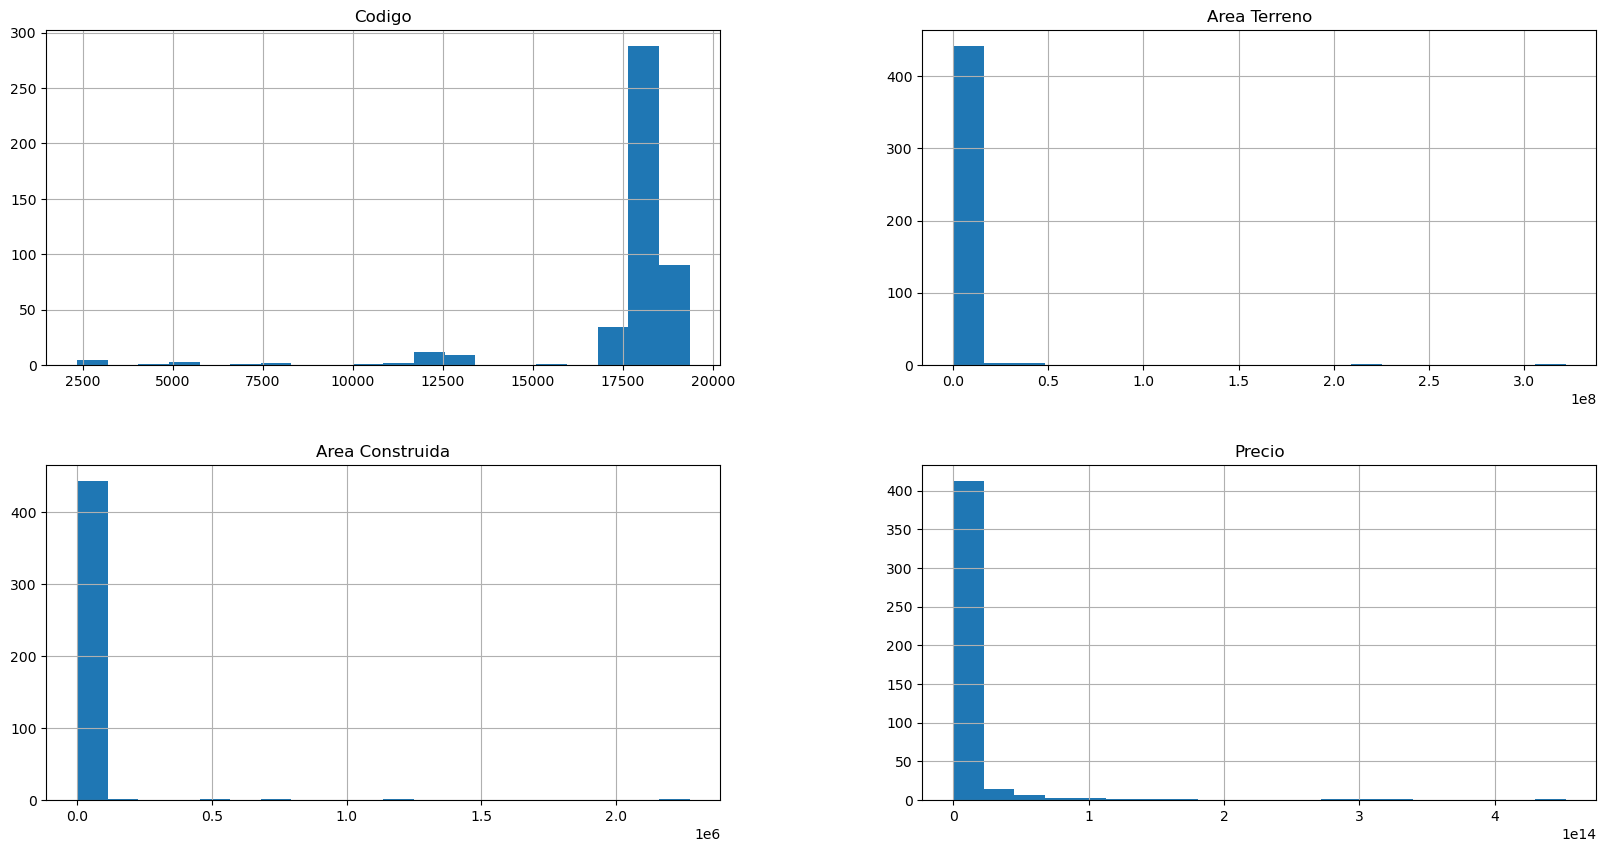

In [7]:
df.hist(bins=20,figsize=(20,10))

Con estos Histogramas de frecuencia podemos identificar Valaores Atipicos con los que logramos buscar las respuestas que senos solicitan

El mapa de calor nos muestra tres columnas que podemos usar para realizar nuestro analisis.

<Axes: >

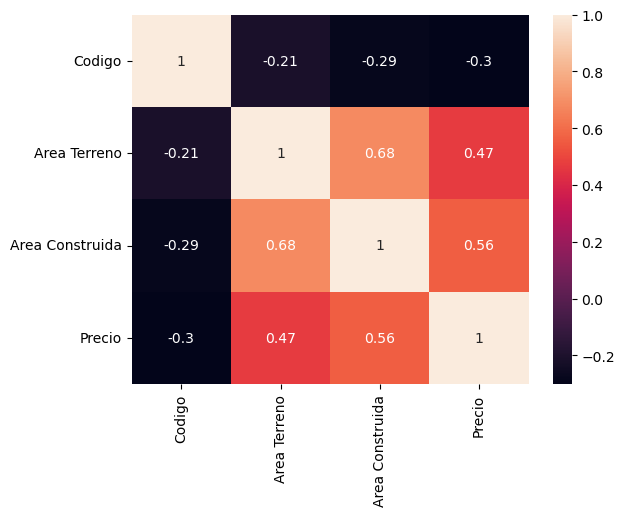

In [8]:
correlacion = df.select_dtypes(include=['number']).corr() 

sns.heatmap(correlacion,xticklabels=correlacion.columns,yticklabels=correlacion.columns,annot=True)

Con la fucion ***.sort_values*** encontramos los precios mas altos y los mas bajos y a quienes corresponde.

<h5>Predios Alto Precio</h5>

In [9]:
precio=df.sort_values('Precio', ascending=False)
precio.head(3)


,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
13,11409,BUGA,VALLE DEL CAUCA,VEREDA CHAMBIMBAL,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,321719700,2272400,COMERCIALIZABLE FIDUCIA,RURAL,452337898200000,LOTE MIXTO,NaN
68,17510,BOGOTA,CUNDINAMARCA,NaN,DG 48J SUR N° 1A 50,0,0,COMERCIALIZABLE CON RESTRICCION,DOS,328393170351500,LOTE,NaN
44,17180,BOGOTA,CUNDINAMARCA,NaN,AV CR 7 NO. 166 - 51 LT B,0,0,COMERCIALIZABLE CON RESTRICCION,TRES,295808119000000,LOTE COMERCIAL,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVES DE SU...


<h5>Predios Bajo Precio</h5>

In [10]:
precio=df.sort_values('Precio')
precio.head(3)


,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
383,18851,CARTAGENA,BOLÍVAR,NaN,"KILÓMETRO 4 DE LA VÍA MAMONAL CARRERA 56, #6...",0,0,COMERCIALIZABLE,COMERCIAL,0,BODEGA,ESTE PORCENTAJE DE PROPIEDAD SE VENDE JUNTO CO...
49,17337,PEREIRA,RISARALDA,AV 30 DE AGOSTO,CL 69 O ACCESO A CUBA AV 30 DE AGOSTO LOTE ...,0,0,COMERCIALIZABLE CON RESTRICCION,DOS,65990400000,LOTE VIVIENDA,NaN
316,18447,VILLAVICENCIO,META,NaN,CENTRAL MINORISTA DE ABASTOS DE VILLAVICENCIO ...,0,0,COMERCIALIZABLE,COMERCIAL,69750000000,LOCAL,NaN


In [11]:
rangos  = [0,100000000000, 1000000000000, 500000000000000]
nombrerango = ["Bajo", "Medio", "Alto"]

In [12]:
df['Rango_Precio'] = pd.cut(df['Precio'], rangos, labels = nombrerango)

In [13]:
df.head(3)

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales,Rango_Precio
0,2330,BOGOTA,CUNDINAMARCA,SANTA MATILDE,CL 10 SUR # 34B-24 LT 2 MZ X-46 (SANTA MATILDE...,559804,0,COMERCIALIZABLE CON RESTRICCION,TRES,134280960000000,LOTE VIVIENDA,NaN,Alto
1,2363,BOGOTA,CUNDINAMARCA,TINTALA,KR 84 CON CL 10 LT # 8 DE SAN JUAN DE CASTILLA...,302079,0,COMERCIALIZABLE CON RESTRICCION,TRES,32857503970000,LOTE COMERCIAL,"ESTE INMUEBLE PRESENTA ZONA DE RESERVA VIAL, Q...",Alto
2,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,165508,726900,COMERCIALIZABLE CON RESTRICCION,COMERCIAL,147133144000000,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...,Alto


Agrupamos columnas par generar rangos de informacion importante tambien se genera nuevas columnas para generar graficos que nos muestren mas claramete los precios

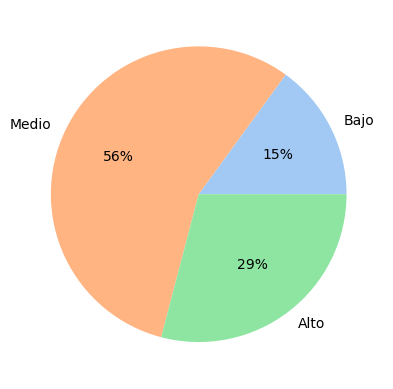

In [14]:
rango_precios=df['Rango_Precio'].groupby(df['Rango_Precio']).count()
labels=["Bajo", "Medio", "Alto"]
colors = sns.color_palette('pastel')[0:6]
plt.pie(rango_precios, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

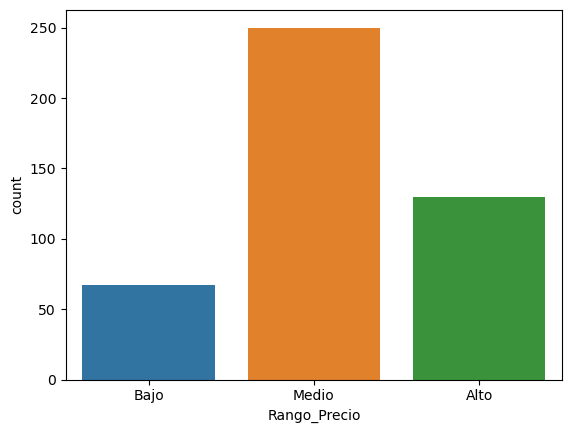

In [15]:
plt.Figure(figsize=(10,7))
sns.countplot(x = df.Rango_Precio)
plt.show()

Para finalizar usamos grafico de caja y bigote para determinar que la mayor distribucion de datos esta en las areas contruidas en precio alto

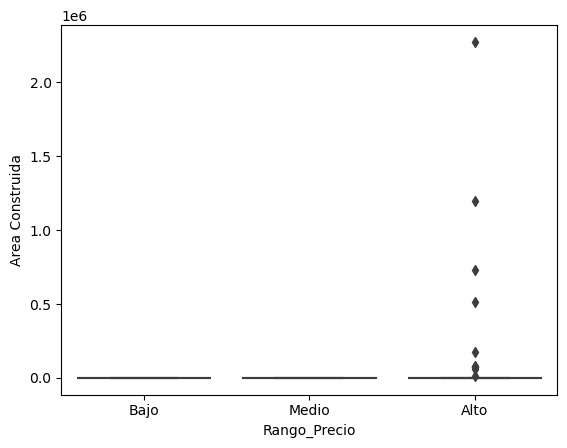

In [16]:
Rprecio_valor = sns.boxplot(x=df["Rango_Precio"],
y=df["Area Construida"])

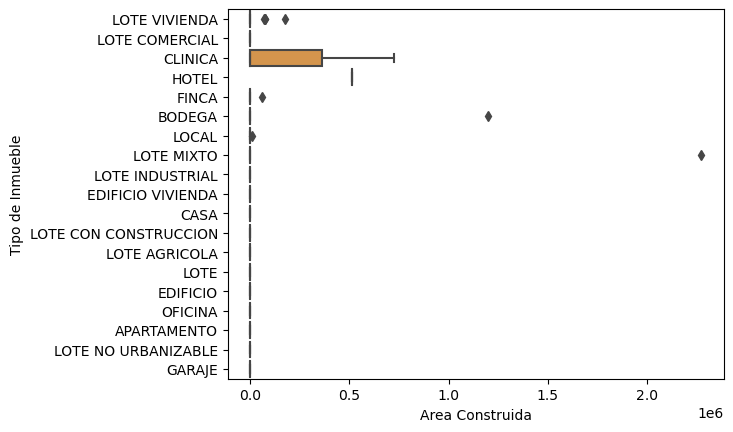

In [17]:
Rprecio_valor = sns.boxplot(x=df["Area Construida"],
y=df["Tipo de Inmueble"])

se encuentran que los predios CLINICA son la mayoria de los datos

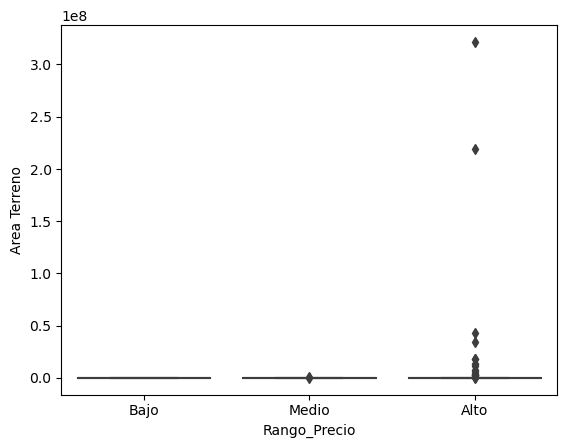

In [18]:
Rprecio_valor = sns.boxplot(x=df["Rango_Precio"],
y=df["Area Terreno"])

***CONCLUCIONES***

Determinamos los tres predios con mayor valor, identificados con los siguientes codigos: 11409, 17510, 17180 como muestra la celda numero 9.

Los predios con los valores mas bajos son los que estan bajo los codigos 17337 y 18447 como se muestra en la celda numero 10, descartamos el codigo 18851 por tener como precio 0.

Se puede observar que el 56% de los predios esta en el rango de 100.000.000.000 pesos y 1.000.000.000.000 pesos, el 29% lo encontramosen rango alto hasta 500.000.000.000.000 pesos, por ultimo el rango bajo el 15% de los predios por debajo 100.000.000.000 pesos.

Encontramos que la mayoria de predios registrados con areaconstruida que se encuentran a la venta son CLINICAS seguidp por LOCALES, lo que nos indica la tendencia de los predios.

